In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [2]:
df = pd.read_csv("Parkinson_Dataset_2.csv")
df.head()

,Unnamed: 0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,11.0,1.0,0.82127,0.66846,0.26212,375.0,374.0,0.005139,0.000044,...,11.9821,6.5816,6.1763,4.8050,4.6671,5.8098,6.1651,4.5811,6.2012,0
1,1,14.0,0.0,0.88352,0.79509,0.36585,397.0,396.0,0.004861,0.000054,...,1.5935,2.2826,2.6744,2.4310,2.8983,8.2023,17.1918,16.8211,68.1856,0
2,2,24.0,0.0,0.20452,0.70358,0.67909,286.0,285.0,0.006754,0.002272,...,3.2624,3.3508,3.3938,3.5254,3.3666,4.1292,5.7149,3.9599,3.3665,0
3,3,27.0,0.0,0.34488,0.62269,0.48573,443.0,441.0,0.004353,0.000628,...,52.3417,29.9333,7.1216,3.5414,3.1618,2.9177,19.8108,35.6502,62.9818,0
4,4,27.0,0.0,0.84627,0.61553,0.58034,480.0,479.0,0.004019,0.000027,...,4.8888,3.3080,2.3842,2.8639,2.5491,2.4263,3.7174,4.6597,5.4125,0


In [3]:
df = df.iloc[:,1:]
arr = df.values
print(arr)
X = arr[:,:-1]
y = arr[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

[[1.10000e+01 1.00000e+00 8.21270e-01 ... 4.58110e+00 6.20120e+00
  0.00000e+00]
 [1.40000e+01 0.00000e+00 8.83520e-01 ... 1.68211e+01 6.81856e+01
  0.00000e+00]
 [2.40000e+01 0.00000e+00 2.04520e-01 ... 3.95990e+00 3.36650e+00
  0.00000e+00]
 ...
 [2.40000e+02 0.00000e+00 8.10960e-01 ... 3.72090e+00 2.74980e+01
  1.00000e+00]
 [2.47000e+02 0.00000e+00 7.86450e-01 ... 4.14489e+01 9.06155e+01
  1.00000e+00]
 [2.48000e+02 1.00000e+00 1.52730e-01 ... 8.12080e+00 2.98880e+00
  1.00000e+00]]


In [5]:
print(X_train.shape,X_test.shape)

(401, 754) (101, 754)


In [20]:
gmm = GaussianMixture(n_components=50,covariance_type='spherical')
gmm.fit(X_train)
prob_arr = gmm.predict_proba(X_train)

In [21]:
print(prob_arr.shape)
ones = np.ones((prob_arr.shape[0],1))
feat_arr = np.hstack((prob_arr,ones))
print(feat_arr.shape,y_train.shape)

(401, 50)
(401, 51) (401,)


In [22]:
y_sig = []
for i in range(len(y_train)):
    if y_train[i]==0:
        y_sig.append(0.001)
    if y_train[i]==1:
        y_sig.append(0.999)
y_sig = np.array(y_sig)
y_train_2 = np.log(y_sig/(1-y_sig))

In [23]:
param = np.linalg.pinv(feat_arr)@y_train_2
W = param[:-1]
b = param[-1]

In [24]:

test_prob_arr = gmm.predict_proba(X_test)
ones = np.ones((test_prob_arr.shape[0],1))
test_feat_arr = np.hstack((test_prob_arr,ones))
y_pred = test_feat_arr@param
y_score = 1/(1+np.exp(-y_pred))
y_final = []
for i in range(len(y_score)):
    if y_score[i]>=0.5:
        y_final.append(1)
    if y_score[i]<0.5:
        y_final.append(0)
y_final = np.array(y_final)
print(y_final)
print(y_test)

[1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1]
[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1.]


In [25]:
accuracy_score(y_test,y_final)

0.9108910891089109

In [26]:
comp_array = np.linspace(10,100,10)

acc_ls = []
for comp in comp_array:
    
    gmm = GaussianMixture(n_components=50,covariance_type='spherical')
    gmm.fit(X_train)
    prob_arr = gmm.predict_proba(X_train)


    ones = np.ones((prob_arr.shape[0],1))
    feat_arr = np.hstack((prob_arr,ones))

    y_sig = []
    for i in range(len(y_train)):
        if y_train[i]==0:
            y_sig.append(0.001)
        if y_train[i]==1:
            y_sig.append(0.999)
    y_sig = np.array(y_sig)
    y_train_2 = np.log(y_sig/(1-y_sig))

    param = np.linalg.pinv(feat_arr)@y_train_2

    test_prob_arr = gmm.predict_proba(X_test)
    ones = np.ones((test_prob_arr.shape[0],1))
    test_feat_arr = np.hstack((test_prob_arr,ones))
    y_pred = test_feat_arr@param
    y_score = 1/(1+np.exp(-y_pred))
    y_final = []
    for i in range(len(y_score)):
        if y_score[i]>=0.5:
            y_final.append(1)
        if y_score[i]<0.5:
            y_final.append(0)
    y_final = np.array(y_final)
    acc = accuracy_score(y_test,y_final)
    acc_ls.append(acc)

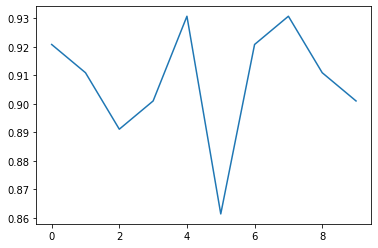

In [27]:
import matplotlib.pyplot as plt

plt.plot(acc_ls)